In [30]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

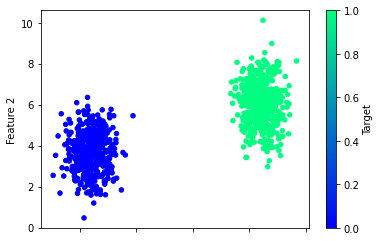

In [31]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [32]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [33]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [35]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [36]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [37]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 143us/sample - loss: 0.6288 - acc: 0.9707
Epoch 2/100
750/750 [==============================] - 0s 31us/sample - loss: 0.6193 - acc: 1.0000
Epoch 3/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6091 - acc: 1.0000
Epoch 4/100
750/750 [==============================] - 0s 25us/sample - loss: 0.5983 - acc: 1.0000
Epoch 5/100
750/750 [==============================] - 0s 28us/sample - loss: 0.5867 - acc: 1.0000
Epoch 6/100
750/750 [==============================] - 0s 28us/sample - loss: 0.5746 - acc: 1.0000
Epoch 7/100
750/750 [==============================] - 0s 28us/sample - loss: 0.5620 - acc: 1.0000
Epoch 8/100
750/750 [==============================] - 0s 27us/sample - loss: 0.5489 - acc: 1.0000
Epoch 9/100
750/750 [==============================] - 0s 28us/sample - loss: 0.5355 - acc: 1.0000
Epoch 10/100
750/750 [==============================] - 0s 28us/sample - loss: 0.5218 - acc: 1.0000
Epoch 11

750/750 [==============================] - 0s 27us/sample - loss: 0.0949 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 27us/sample - loss: 0.0933 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 27us/sample - loss: 0.0918 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 28us/sample - loss: 0.0903 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 27us/sample - loss: 0.0888 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 29us/sample - loss: 0.0873 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 27us/sample - loss: 0.0859 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 28us/sample - loss: 0.0845 - acc: 1.0000
Epoch 91/100
750/750 [==============================] - 0s 25us/sample - loss: 0.0832 - acc: 1.0000
Epoch 92/100
750/750 [==============================] - 0s 27us/sample - loss: 0.0818 - acc: 1.0000
Epoch 93/100


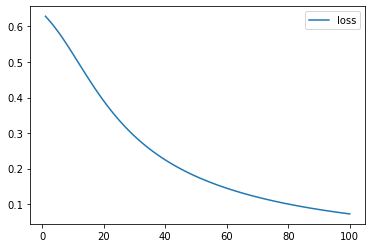

In [48]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

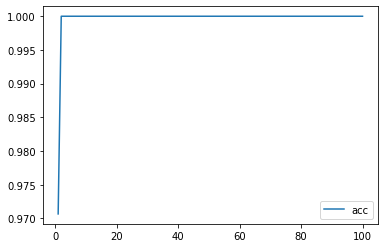

In [56]:
# Plot the accuracy
history_df.plot(y="acc")

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0729 - acc: 1.0000
Loss: 0.07294287288188935, Accuracy: 1.0


In [57]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

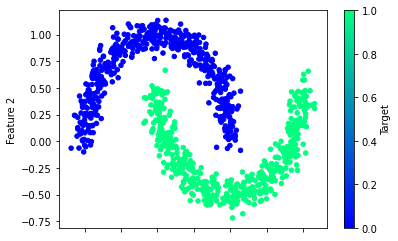

In [58]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [59]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [60]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 32us/sample - loss: 1.1183 - acc: 0.4600
Epoch 2/100
750/750 [==============================] - 0s 36us/sample - loss: 1.0116 - acc: 0.4813
Epoch 3/100
750/750 [==============================] - 0s 29us/sample - loss: 0.9385 - acc: 0.4973
Epoch 4/100
750/750 [==============================] - 0s 28us/sample - loss: 0.8868 - acc: 0.5053
Epoch 5/100
750/750 [==============================] - 0s 28us/sample - loss: 0.8464 - acc: 0.5147
Epoch 6/100
750/750 [==============================] - 0s 32us/sample - loss: 0.8143 - acc: 0.5267
Epoch 7/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7862 - acc: 0.5360
Epoch 8/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7624 - acc: 0.5427
Epoch 9/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7402 - acc: 0.5453
Epoch 10/100
750/750 [==============================] - 0s 33us/sample - loss: 0.7205 - acc: 0.5547
Epoch 11/

750/750 [==============================] - 0s 28us/sample - loss: 0.3044 - acc: 0.8547
Epoch 84/100
750/750 [==============================] - 0s 27us/sample - loss: 0.3027 - acc: 0.8573
Epoch 85/100
750/750 [==============================] - 0s 27us/sample - loss: 0.3012 - acc: 0.8573
Epoch 86/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2994 - acc: 0.8587
Epoch 87/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2978 - acc: 0.8613
Epoch 88/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2964 - acc: 0.8640
Epoch 89/100
750/750 [==============================] - 0s 36us/sample - loss: 0.2949 - acc: 0.8653
Epoch 90/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2935 - acc: 0.8653
Epoch 91/100
750/750 [==============================] - 0s 35us/sample - loss: 0.2922 - acc: 0.8667
Epoch 92/100
750/750 [==============================] - 0s 36us/sample - loss: 0.2909 - acc: 0.8680
Epoch 93/100


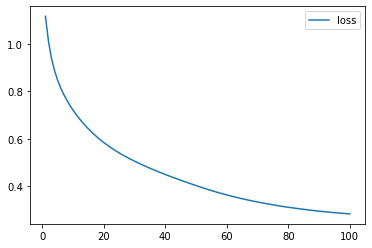

In [61]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

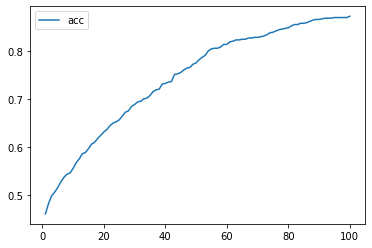

In [62]:
# Plot the loss
history_df.plot(y="acc")

In [63]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [65]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [66]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 144us/sample - loss: 0.6092 - acc: 0.6747
Epoch 2/100
750/750 [==============================] - 0s 28us/sample - loss: 0.5687 - acc: 0.7067
Epoch 3/100
750/750 [==============================] - 0s 29us/sample - loss: 0.5318 - acc: 0.7227
Epoch 4/100
750/750 [==============================] - 0s 32us/sample - loss: 0.4986 - acc: 0.7227
Epoch 5/100
750/750 [==============================] - 0s 36us/sample - loss: 0.4687 - acc: 0.7413
Epoch 6/100
750/750 [==============================] - 0s 33us/sample - loss: 0.4418 - acc: 0.7800
Epoch 7/100
750/750 [==============================] - 0s 28us/sample - loss: 0.4185 - acc: 0.8173
Epoch 8/100
750/750 [==============================] - 0s 28us/sample - loss: 0.3973 - acc: 0.8320
Epoch 9/100
750/750 [==============================] - 0s 29us/sample - loss: 0.3793 - acc: 0.8320
Epoch 10/100
750/750 [==============================] - 0s 31us/sample - loss: 0.3626 - acc: 0.8347
Epoch 11

750/750 [==============================] - 0s 29us/sample - loss: 0.2376 - acc: 0.8973
Epoch 84/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2372 - acc: 0.8973
Epoch 85/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2367 - acc: 0.8973
Epoch 86/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2363 - acc: 0.8973
Epoch 87/100
750/750 [==============================] - 0s 35us/sample - loss: 0.2358 - acc: 0.8973
Epoch 88/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2355 - acc: 0.8973
Epoch 89/100
750/750 [==============================] - 0s 37us/sample - loss: 0.2350 - acc: 0.8973
Epoch 90/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2345 - acc: 0.8987
Epoch 91/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2341 - acc: 0.8987
Epoch 92/100
750/750 [==============================] - 0s 31us/sample - loss: 0.2337 - acc: 0.9000
Epoch 93/100
